<a href="https://colab.research.google.com/github/trevinofernando/AI-MachineLearning/blob/master/hw2/Hw2Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Dense Layer Neural Network + Handcrafted Features
####  For the MNIST digit classificiation problem

##Loading and Cleaning Data

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

#28x28 images of hand written digits from 0 to 9
mnist = tf.keras.datasets.mnist

#Extract images and labels from mnist as 2 tuples, one for training and one for testing
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

#RE-shape data to be a vectors instead of img matices
train_images = train_images_original.reshape((60000, 28 * 28))
test_images = test_images_original.reshape((10000, 28 * 28))

#Re-scale data to be from 0 to 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

###Progress Bar GUI

In [21]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

#Demostration of Progress Bar
out = display(progress(0, 100), display_id=True)
for i in range(101):
  out.update(progress(i, 100))

#Handcrafted Features

##Calculating Height and Width of each digits

####Extracting Features for Train Dataset

In [22]:
# Extract Dimensions of input
(img_count, col_size, rows_size) = train_images_original.shape

#Get index of the first Non-Zero pixels in the image
(img_index, col_of_positives, rows_of_positives)= np.where(train_images_original > 0)

#initialize empty feature vectors
train_height = np.array([])
train_width = np.array([])

#Set Empty Progress Bar 
out = display(progress(0, 100), display_id=True)

#loop thru all images
for i in range(img_count):
  out.update(progress(i, img_count))

  #extract all images from mixed matrix
  img = np.where(img_index == i)[0]

  #calculate height and width of digit by substracting the 
  #first and last non-white pixel horizontaly and vertically, 
  #then add one for the index 0 offset
  train_height = np.append(train_height,  abs(col_of_positives[img[-1]] - col_of_positives[img[0]]) + 1)
  train_width = np.append(train_width, abs(rows_of_positives[img[-1]] - rows_of_positives[img[0]]) + 1)
print("Feature Extractione Done!")

#Re-shape vectors to be be compatible for concatenation with the dataset
train_height = train_height.reshape(img_count, 1)
train_width = train_width.reshape(img_count, 1)

#Re-scale data to be from 0 to 1
train_height = train_height.astype('float32') / col_size
train_width = train_width.astype('float32') / rows_size

print("Vector Shape:")
print(train_height.shape)
print("Max height value")
print(np.max(train_height, axis=0))
print("Min height value")
print(np.min(train_height, axis=0))
print("Max width value")
print(np.max(train_width, axis=0))
print("Min width value")
print(np.min(train_width, axis=0))

Feature Extractione Done!
Vector Shape:
(60000, 1)
Max height value
[0.71428573]
Min height value
[0.32142857]
Max width value
[0.71428573]
Min width value
[0.03571429]


####Extracting Features for Test Dataset

In [23]:
# Extract Dimensions of input
(img_count, col_size, rows_size) = test_images_original.shape

#Get index of the first Non-Zero pixels in the image
(img_index, col_of_positives, rows_of_positives)= np.where(test_images_original > 0)

#initialize empty feature vectors
test_height = np.array([])
test_width = np.array([])

#Set Empty Progress Bar 
out = display(progress(0, 100), display_id=True)

#loop thru all images
for i in range(img_count):
  out.update(progress(i, img_count))

  #extract all images from mixed matrix
  img = np.where(img_index == i)[0]

  #calculate height and width of digit by substracting the 
  #first and last non-white pixel horizontaly and vertically, 
  #then add one for the index 0 offset
  test_height = np.append(test_height,  abs(col_of_positives[img[-1]] - col_of_positives[img[0]]) + 1)
  test_width = np.append(test_width, abs(rows_of_positives[img[-1]] - rows_of_positives[img[0]]) + 1)
print("Feature Extractione Done!")

#Re-shape vectors to be be compatible for concatenation with the dataset
test_height = test_height.reshape(img_count, 1)
test_width = test_width.reshape(img_count, 1)

#Re-scale data to be from 0 to 1
test_height = test_height.astype('float32') / col_size
test_width = test_width.astype('float32') / rows_size

print("Vector Shape:")
print(test_height.shape)
print("Max height value")
print(np.max(test_height, axis=0))
print("Min height value")
print(np.min(test_height, axis=0))
print("Max width value")
print(np.max(test_width, axis=0))
print("Min width value")
print(np.min(test_width, axis=0))

Feature Extractione Done!
Vector Shape:
(10000, 1)
Max height value
[0.71428573]
Min height value
[0.35714287]
Max width value
[0.71428573]
Min width value
[0.03571429]


###Adding Handcrafted Feature to the data

####Train Dataset

In [24]:
print(train_images.shape)
print("+")
print(train_height.shape)
print("+")
print(train_width.shape)

#add the 2 new features to the end of the flatten image vector of the train dataset
train_images = np.concatenate((train_images, train_height), axis = 1)
train_images = np.concatenate((train_images, train_width), axis = 1)

print("=")
print(train_images.shape)

(60000, 784)
+
(60000, 1)
+
(60000, 1)
=
(60000, 786)


####Test Dataset

In [25]:
print(test_images.shape)
print("+")
print(test_height.shape)
print("+")
print(test_width.shape)

#add the 2 new features to the end of the flatten image vector of the train dataset
test_images = np.concatenate((test_images, test_height), axis = 1)
test_images = np.concatenate((test_images, test_width), axis = 1)

print("=")
print(test_images.shape)

(10000, 784)
+
(10000, 1)
+
(10000, 1)
=
(10000, 786)


# Categorically Encode the Labels

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

#Network Architecture

In [27]:
model = models.Sequential()

#28*28 is the imgSize and +2 for the 2 hancrafted features
model.add(layers.Dense(512, activation = tf.nn.relu, input_shape=(28 * 28 + 2,))) #Hidden layer using reLu(x) = max(0,x).
model.add(layers.Dense(10, activation = tf.nn.softmax)) #Output layer needs softmax with 10 neurons for One hot encoding
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               402944    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 408,074
Trainable params: 408,074
Non-trainable params: 0
_________________________________________________________________


#Compiling Model

In [0]:
model.compile( optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# Other options: optimer='adam', loss='sparse_categorical_crossentropy'

#Training Model

In [29]:
#Set number of epochs
epochs = 10
#Save training history for analysis purposes later
history = model.fit(train_images, 
                    train_labels, 
                    epochs = epochs,
                    batch_size=128, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2550 - acc: 0.9254 - val_loss: 0.1405 - val_acc: 0.9582
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1038 - acc: 0.9691 - val_loss: 0.1029 - val_acc: 0.9679
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0689 - acc: 0.9793 - val_loss: 0.0802 - val_acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0503 - acc: 0.9845 - val_loss: 0.0730 - val_acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0385 - acc: 0.9881 - val_loss: 0.0681 - val_acc: 0.9795
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0675 - val_acc: 0.9792
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0224 - acc: 0.9935 - val_loss: 0.0692 - val_acc

#Visualization

### Training and Test Loss

In [0]:
#Extract history from model and save it as a dictionary
history_dict = history.history
#Extract the train loss on each epoch
loss_values = history_dict['loss']
#Extract the test loss on each epoch
test_loss_values = history_dict['val_loss']
#Set range for graphing purposes (1 to epochs+1) not inclusive
epochs_range = range(1, epochs + 1)

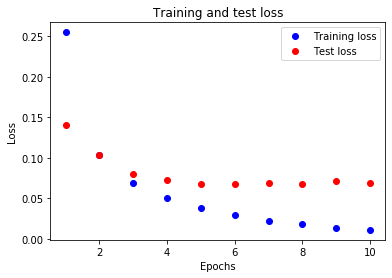

In [31]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

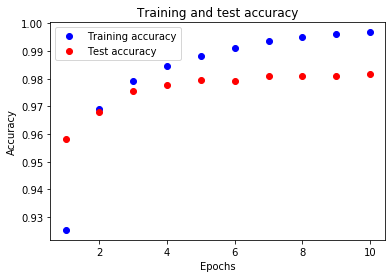

In [33]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Save Model

In [0]:
model.save('Mnist_Height_Width.hw2')

##Load Model

In [0]:
old_model = tf.keras.models.load_model('Mnist_Height_Width.hw2')

#Missclassified digits

In [36]:
#Test model on Test dataset
predictions = old_model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[7 2 1 ... 4 5 6]


In [37]:
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(10000) if predictions[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / 10000.0)

0.9816


Predicted 
9
True label 
4


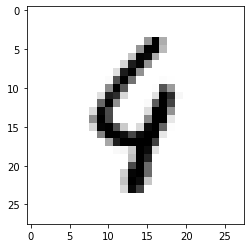

Predicted 
4
True label 
5


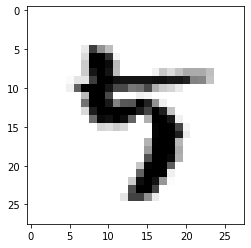

Predicted 
6
True label 
4


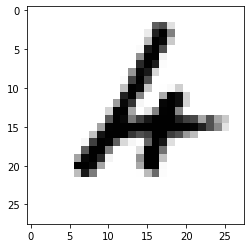

Predicted 
2
True label 
1


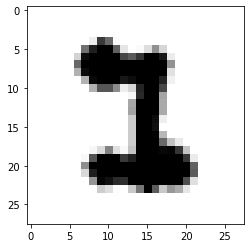

Predicted 
5
True label 
3


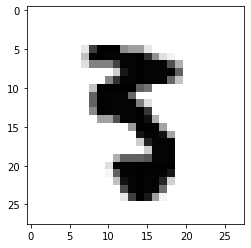

Predicted 
6
True label 
4


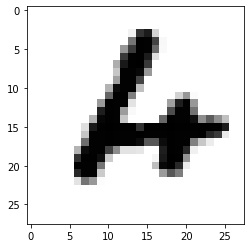

Predicted 
4
True label 
9


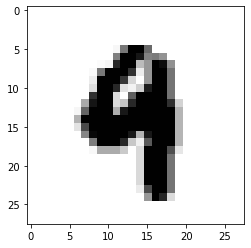

Predicted 
8
True label 
7


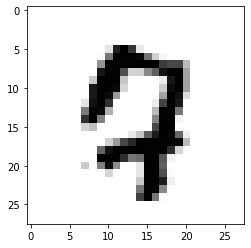

Predicted 
7
True label 
0


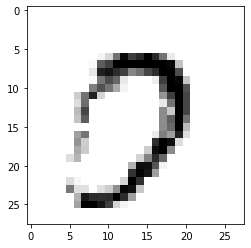

Predicted 
0
True label 
8


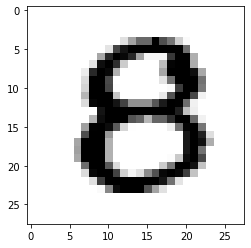

In [38]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(predictions[wrong_index])
  print("True label ")
  print(test_labels_original[wrong_index])
  plt.imshow(test_images_original[wrong_index], cmap = plt.cm.binary)
  plt.show()